In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/Isaac/Desktop/bed_dataset.csv',index_col='year', parse_dates=True)

In [3]:
from pandas.plotting import autocorrelation_plot
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2010-03-01 to 2022-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   total   42 non-null     object
dtypes: object(1)
memory usage: 672.0+ bytes


In [4]:
df.head()

,total
year,
2010-03-01,"122,551"
2010-06-01,"119,298"
2010-09-01,"121,497"
2010-12-01,"123,279"
2011-03-01,"116,452"


In [5]:
df = df.replace(',','', regex=True)
df['total']=df['total'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2010-03-01 to 2022-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   total   42 non-null     int32
dtypes: int32(1)
memory usage: 504.0 bytes


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

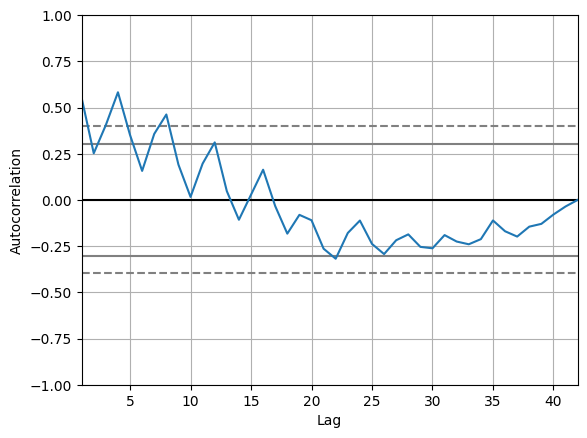

In [209]:
autocorrelation_plot(df)
##p=5

c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


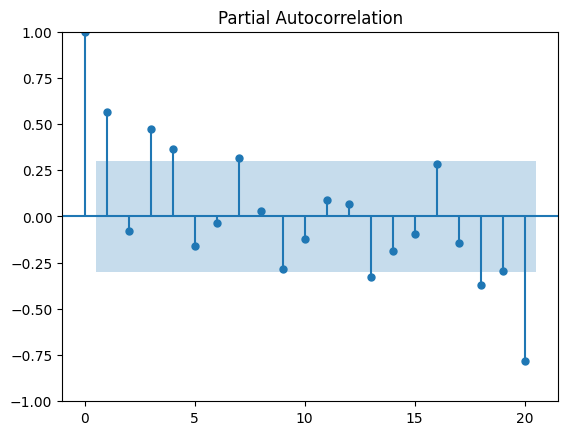

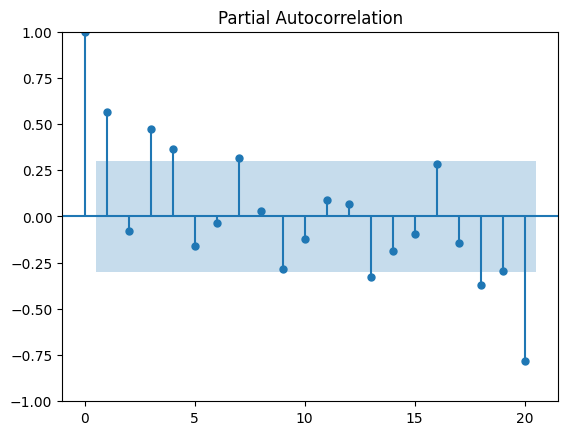

In [210]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df,lags=20)
##q=4

In [211]:
import statsmodels.api as sm


In [212]:
train=df.iloc[:-15]
test=df.iloc[-15:]
model = sm.tsa.arima.ARIMA(train, order=(5,0,4))
model = model.fit()


c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\

In [213]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2016-12-01    118689.261451
2017-03-01    115989.605380
2017-06-01    113720.012574
2017-09-01    114913.637548
2017-12-01    119233.048229
2018-03-01    116707.515682
2018-06-01    114281.963916
2018-09-01    115252.442597
2018-12-01    119632.969760
2019-03-01    117292.742172
2019-06-01    114728.622011
2019-09-01    115474.942173
2019-12-01    119909.586922
2020-03-01    117765.358325
2020-06-01    115080.507617
Freq: QS-DEC, Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='year'>

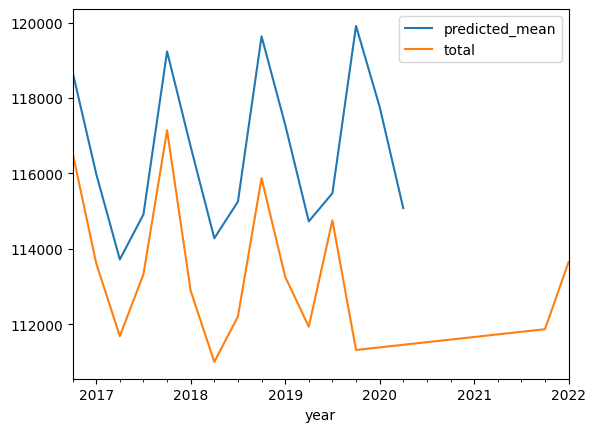

In [214]:
pred.plot(legend=True)
test['total'].plot(legend=True)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [216]:
r2_score(test,pred)

-3.0086261743644

In [218]:
mean_squared_error(test,pred)

13670951.288868157

In [219]:
mean_absolute_error(test,pred)

3171.681090481812

In [7]:
##prophet test
bed_df = df.reset_index()

In [8]:
df=bed_df.rename(columns={'year':'ds', 'total':'y'})
df.tail()

,ds,y
37,2019-06-01,111938
38,2019-09-01,114757
39,2019-12-01,111321
40,2021-12-01,111871
41,2022-03-01,113651


Importing plotly failed. Interactive plots will not work.


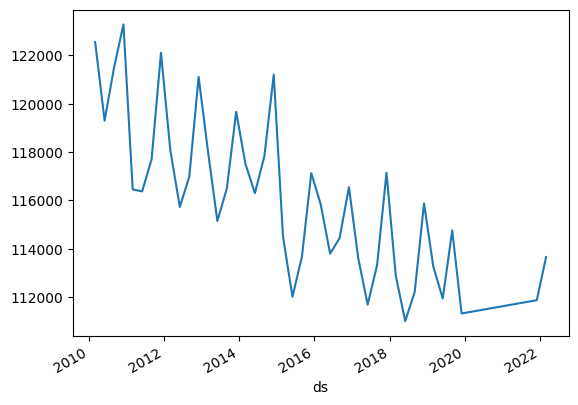

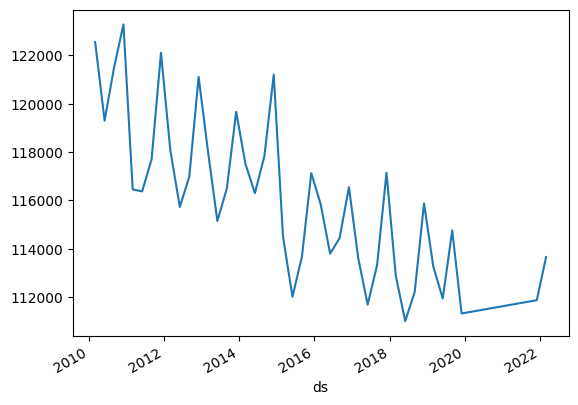

In [9]:
from prophet import Prophet
import matplotlib.pyplot as plt
plt.figure()
df.set_index('ds').y.plot().get_figure()

In [10]:
model = Prophet(yearly_seasonality =False)
model.fit(df);

18:15:48 - cmdstanpy - INFO - Chain [1] start processing
18:15:48 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
61,2023-10-31
62,2023-11-30
63,2023-12-31
64,2024-01-31
65,2024-02-29


In [12]:
forecast = model.predict(future)

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
61,2023-10-31,110728.324588,108040.390192,113257.665889
62,2023-11-30,110684.219793,108075.934538,113321.731526
63,2023-12-31,110638.644837,108047.988692,113383.020186
64,2024-01-31,110593.069882,107985.984431,113199.472566
65,2024-02-29,110550.435246,107900.960753,113333.011133


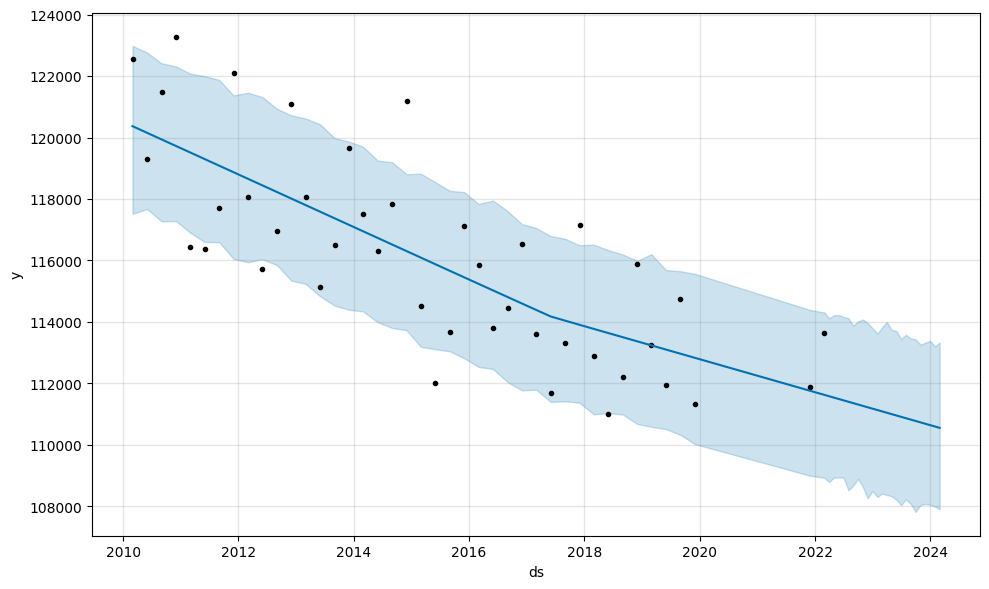

In [14]:
model.plot(forecast);

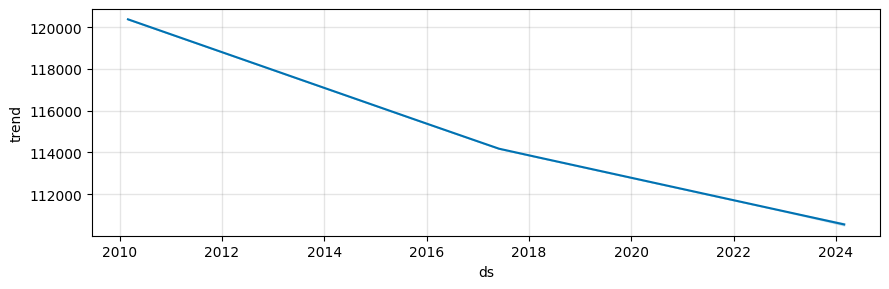

In [15]:
model.plot_components(forecast);

In [16]:
new_metric = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [17]:
new_metric.dropna(inplace=True)
new_metric.head()

,ds,yhat,y
0,2010-03-01,120370.971669,122551.0
1,2010-06-01,120155.462381,119298.0
2,2010-09-01,119939.953091,121497.0
3,2010-12-01,119726.786294,123279.0
4,2011-03-01,119515.961988,116452.0


In [18]:
r2_score(new_metric.y, new_metric.yhat)

0.5869603641847614

In [20]:
##lower is better
mean_squared_error(new_metric.y, new_metric.yhat)

4367837.999004772

In [21]:
##lower is better
mean_absolute_error(new_metric.y, new_metric.yhat)

1764.7212599793286

In [64]:
from prophet.serialize import model_to_json, model_from_json


In [65]:
with open('bed_model.json', 'w') as fout:
    fout.write(model_to_json(model))
    ##save model